# Bayes

https://en.wikipedia.org/wiki/Thomas_Bayes

![bayes](../data/bayes0.jpeg)

$$A \cap B = B \cap A$$

$$P(A \cap B) = P(B \cap A)$$

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

### Regla de Bayes

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

donde:

+ $P(A|B) :=$ A posteriori
+ $P(A) :=$ A priori
+ $P(B|A) :=$ Verosimilitud (likelihood)
+ $P(B) :=$ Marginal de B


En realidad:
$$P(B) = \sum_{\Omega} P(B|A)P(A)$$

# Ejemplo: Seguro de coche segun color

**Eventos**

+ $A: =$ Accidente de coche
+ $B: =$ Color del coche (rojo, por ejemplo)

**¿Que es cada cosa?**

+ $P(A|B) :=$ ¿Prob de tener un accidente si mi coche es rojo? (lo que buscamos)
+ $P(A) :=$ Prob de accidente (proporcion de coches accidentados en todo el parque movil)
+ $P(B|A) :=$ Si ya he tenido un accidente, ¿cual es la prob de que mi coche sea rojo? (proporcion de coches rojos entre los accidentados)
+ $P(B) :=$ Prob de coche rojo (proporcion de coches rojos en todo el parque movil)

**Supongamos...**
 
+ $P(A) = 0.1$ 
+ $P(B|A) = 0.3$ 
+ $P(B) = 0.2$


**Entonces..**

In [1]:
print('P(A|B) = {}'.format(0.3*0.1/0.2))

P(A|B) = 0.15


**Conclusion**

La prob de tener un accidente si mi coche es rojo es de 0.15

...pero es extensible a distribuciones..

## Interpretación diacrónica de la regla de Bayes

**Supongamos..**

+ $A: =$ H (hipótesis)
+ $B: =$ D (datos)

Entonces:

$$P(H|D) = \frac{P(D|H)P(H)}{P(D)}$$

¿Que es $P(D)$?

$$P(D) = \sum_{\Omega} P(D|H)P(H)$$

**Solucion**

Se tienen dos hipótesis, H0 y H1:

$$\frac{P(H_1|D) = \frac{P(D|H_1)P(H_1)}{P(D)}}{P(H_0|D) = \frac{P(D|H_0)P(H_0)}{P(D)}}$$




$$\frac{P(H_1|D)}{P(H_0|D)} = \frac{P(D|H_1)P(H_1)}{P(D|H_0)P(H_0)}$$


Desde aqui solo hay que obtener ese cociente y ver si es mayor o menor que 1.

# Bayes Lab

### 1. Cookie Problem
Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [3]:
def bayes(priori, vero):
    
    marginal=sum(np.multiply(priori, vero))
    
    posteriori=np.divide(np.multiply(priori, vero), marginal)
    
    return posteriori

In [5]:
priori=[1/2, 1/2]

v_vainilla=[3/4, 1/2]
v_choco=[1/4, 1/2]

In [7]:
bayes(priori, v_vainilla)[0]

0.6

What is the probability that it came from Bowl 2?

In [8]:
bayes(priori, v_vainilla)[1]

0.4

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [9]:
bayes(priori, v_choco)

array([0.33333333, 0.66666667])

### 2. Candy Problem
Suppose you have two bags of candies:

In **Bag 1**, the mix of colors is:
* Brown - 30%
* Yellow - 20%
* Red - 20%
* Green - 10%
* Orange - 10%
* Tan - 10%


In **Bag 2**, the mix of colors is:
* Blue - 24%
* Green - 20%
* Orange - 16%
* Yellow - 14%
* Red - 13%
* Brown - 13%




Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.

In [10]:
priori=[1/2, 1/2]

v_marron=[0.3, 0.13]
v_amarillo=[0.2, 0.14]
v_rojo=[0.2, 0.13]
v_verde=[0.1, 0.2]
v_naranja=[0.1, 0.16]
v_mandarina=[0.1, 0]
v_azul=[0, 0.24]

In [12]:
bayes(priori, [v_amarillo[0]*v_verde[1], v_amarillo[1]*v_verde[0]])[0]

0.7407407407407408

What is the probability that the yellow candy came from Bag 2?

In [13]:
bayes(priori, [v_amarillo[0]*v_verde[1], v_amarillo[1]*v_verde[0]])[1]

0.25925925925925924

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

Las probabilidades de la verde son las complementarias de cada una, es decir, la probabilidad de que la verde venga de la bolsa 1 es 0.259 y la probabilidad de que la verde venga de la bolsa 2 es 0.7407.

### 3. Monty Hall Problem
Suppose you are a contestant on the popular game show Let's Make a Deal. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [14]:
priori=[1/3, 1/3, 1/3]


vero=[0, 1, 1/2]

In [15]:
bayes(priori, vero)

array([0.        , 0.66666667, 0.33333333])

# Conjugado a priori

https://en.wikipedia.org/wiki/Conjugate_prior

https://en.wikipedia.org/wiki/Beta_distribution

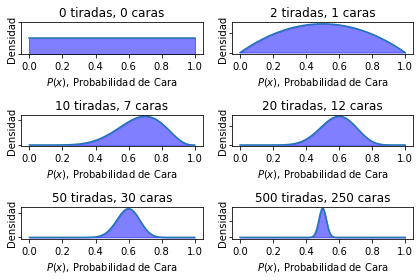

In [16]:
# tiros_de_moneda.py  (modelo beta-binomial)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, beta               


tiradas=[0,2,10,20,50,500]    # lista del numero de intentos (experimentos de Bernoulli)
  
datos=bernoulli.rvs(0.5,size=tiradas[-1])   # se tiran 500 veces la moneda, 0-cruz, 1-cara (B(p,n))

x=np.linspace(0,1,100)  # espaciado lineal entre 0 y 1, 100 puntos, se discretiza el eje x


for i,N in enumerate(tiradas):  # se actualiza la informacion respecto al nº de tiradas, modelo beta-binomial (i actualizaciones , N tiradas)

    caras=datos[:N].sum()        # suma las caras que van saliendo
    ax=plt.subplot(len(tiradas)/2, 2, i+1)             # se crea un plot cada vez que se actualiza
    ax.set_title("%s tiradas, %s caras" % (N, caras))  # titulo  
    plt.xlabel("$P(x)$, Probabilidad de Cara")         # etiqueta x
    plt.ylabel("Densidad")                             # etiqueta y
    if i == 0:                                         # limite del eje y en el primer plot (0 tiradas)
        plt.ylim([0.0, 2.0])
    plt.setp(ax.get_yticklabels(), visible=False)      # quita los numeros del eje y
    y=beta.pdf(x, 1+caras, 1+N-caras)                  # se crea y se dibuja la distribucion beta que representa... (Beta(x,a,b))
    plt.plot(x,y)                                      # ... la creencia a posteriori de la perfeccion de la moneda (beta-binomial, bayesiano)
    plt.fill_between(x, 0, y, color='b', alpha=0.5)    # se rellena de color la distribucion 


plt.tight_layout()  # se expande el plot
plt.show();         # se plotea

# A/B testing bayesiano

In [ ]:
from lib.bayes_func import *

### what if...? 

¿cual es la prob de que el test sea superior a 0.003 (CR)?

# Bayesian GridSearching

https://github.com/hyperopt/hyperopt